In [52]:
import pygad
import numpy

In [53]:
items = [{'item': 'zegar', 'value': 100, 'weight': 7},
         {'item': 'obraz-pejzaż', 'value': 300, 'weight': 7},
         {'item': 'obraz-portret', 'value': 200, 'weight': 6},
         {'item': 'radio', 'value': 40, 'weight': 2},
         {'item': 'laptop', 'value': 500, 'weight': 5},
         {'item': 'lampka nocna', 'value': 70, 'weight': 6},
         {'item': 'srebrne sztućce', 'value': 100, 'weight': 1},
         {'item': 'porcelana', 'value': 250, 'weight': 3},
         {'item': 'figura z brązu', 'value': 300, 'weight': 10},
         {'item': 'skórzana torebka', 'value': 280, 'weight': 3},
         {'item': 'odkurzacz', 'value': 300, 'weight': 15}] 


In [54]:
gene_space = [0, 1]

def fitness_func(solution, solution_idx):
    value_sum = 0
    weight_sum = 0
    for count, i in enumerate(solution):
        if i != 0:
            value_sum = value_sum + items[count]["value"]
            weight_sum = weight_sum + items[count]["weight"]
    if weight_sum > 25:
        return 0
    return value_sum


fitness_function = fitness_func

In [55]:
sol_per_pop = 20
num_genes = len(items)

# ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
# ile pokolen
# ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 15
keep_parents = 2

# jaki typ selekcji rodzicow?
# sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

# w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

# mutacja ma dzialac na ilu procent genow?
# trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8

Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630
Predicted output based on the best solution : [{'item': 'obraz-pejzaż', 'value': 300, 'weight': 7}, {'item': 'obraz-portret', 'value': 200, 'weight': 6}, {'item': 'laptop', 'value': 500, 'weight': 5}, {'item': 'srebrne sztućce', 'value': 100, 'weight': 1}, {'item': 'porcelana', 'value': 250, 'weight': 3}, {'item': 'skórzana torebka', 'value': 280, 'weight': 3}]


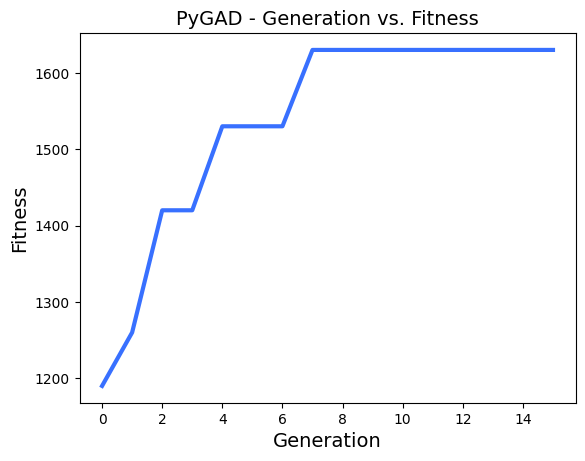

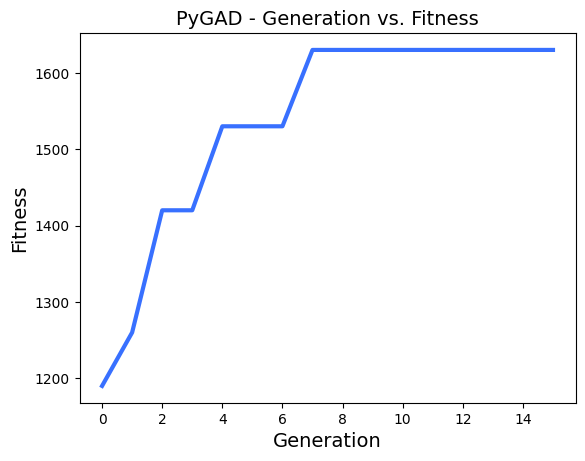

In [56]:
# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

# uruchomienie algorytmu
ga_instance.run()

# podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))

prediction = []
for i, j in zip(items, solution):
    if j != 0:
        prediction.append(i)
print("Predicted output based on the best solution : {prediction}".format(
    prediction=prediction))

# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()